![Astrofisica Computacional](../../logo.PNG)

---
## RK4 method to describe the motion of a particle in a gravitational field


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

This notebook presents the application of the RK4 method to the problem of the motion of a particle in a gravitational field.

---

## A Gravitational System

In this application problem, the motion of a test particle in a gravitational field is described. The mass of the test particle will be considered to be much smaller than the mass of the object that produces the gravitational, $m \ll M$. For example, the mass of Halley's Comet is $m \approx 2.2 \times 10^{14}$ kg, which is a very small amount compared to the mass of the Sun, $M \approx 1.9 \times 10^{30} $ kg.

This assumption implies that the test particle will move while the central object remains stationary at the origin of coordinates. In this way, the Hamiltonian describing this system will be

$$
\mathcal{H} = \frac{1}{2} \left( p_r^2 + \frac{p_\varphi^2}{r^2} \right) - \frac{GM}{r},
$$
where the motion has been restricted to the equatorial plane.

There are two conserved quantities in the physica system: 
- The energy: $\varepsilon = \mathcal{H}$
- The azimuthal component of the angular momentum: $\ell_z = p_\varphi$

To solve this problem numerically, we write the equations of motion as

\begin{align}
\frac{dr}{dt} = & \frac{\partial \mathcal{H}}{\partial p_r} = p_r \\
\frac{d\varphi}{dt} = & \frac{\partial \mathcal{H}}{\partial p_\varphi} =  \frac{\ell_z}{r^2} \\ 
\frac{dp_r}{dt} = & -\frac{\partial \mathcal{H}}{\partial r} = \frac{\ell_z}{r^3} - \frac{GM}{r^2} \\
\frac{dp_\varphi}{dt} = & -\frac{\partial \mathcal{H}}{\partial \varphi} =  0 .
\end{align}


An important consideration has to do with the magnitudes of the physical quantities and constants involved in the problem. For the development, we will use the following system of units:

- Units of mass: Solar Masses $M_{\odot}$
- Distance units: astronomical units [au]
- Time units: years [yr]

In this system of units, the Newtonian gravitational constant takes the value $G = 4\pi^2$.

In [1]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = r
        q0[1] = phi
        q0[2] = p_r
        q0[3] = p_phi = l_z
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    f = np.zeros(4)
    f[0] = q0[2]
    f[1] = q0[3]/q0[0]**2
    f[2] = q0[3]**2/q0[0]**3 - G*M/q0[0]**2
    f[3] = 0
    return f

def conserv_quant(q):
    '''
    ------------------------------------------
    conserv_quant(q)
    ------------------------------------------
    Evaluates the total energy and the total 
    angular momentum for the system 
    ------------------------------------------
    Arguments:
    q: NumPy array with the state of the 
       system in the format
       q = [t, r, theta, p_r, p_theta]
    ------------------------------------------
    Returns:
    E : Total Energy
    L : Total Angular Momentum
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    CQ = np.zeros([len(q),3])
    CQ[:,0] = q[:,0] 
    v2 = q[:,3]**2 + q[:,4]**2/q[:,1]**2
    E = v2/2 - G*M/q[:,1]
    L = q[:,4]
    CQ[:,1] = E
    CQ[:,2] = L
    return CQ


---
## Initial Condition

Choosing the initial condition can be a crucial aspect in the case of the two-body gravitational problem. One way to adequately establish this condition is by using the energy to define the effective potential,

\begin{equation}
\varepsilon = \frac{1}{2}  \left[ \dot{r}^2 + r^2 \dot{\varphi}^2\right] - \frac{GM}{r}
\end{equation}

\begin{equation}
 \frac{1}{2} \dot{r}^2  = \varepsilon - V_{\text{eff}}(r)
\end{equation}

where 

\begin{equation}
V_{\text{eff}} (r) = \frac{l_z^2}{2r^2} - \frac{GM}{r}.
\end{equation}

### Conditions for Bounded Motion

From the relationships presented it is possible to obtain the initial condition for a specific kind of orbit. First, we must remember that bounded trajectories, for a fixed value of angular momentum, $l$, must have a negative energy, i.e. $E< 0$.  Given these values, the pericenter of the orbit is located at the point at which $\dot{r} = p_r = 0$. From the relation defining the effective potential, we may obtain the radial coordinate of the pericenter which can be considered as the initial position of the particle,
\begin{equation}
 \frac{1}{2} \dot{r}^2  =  0 = \varepsilon -  \frac{l_z^2}{2r_0^2} - \frac{GM}{r_0}.
\end{equation}
which gives
\begin{equation}
r_0 = \frac{-GM \pm \sqrt{G^2 M^2 +2 \varepsilon \ell_z^2} }{2\varepsilon}.
\end{equation}


Hence, the set of initial condition needed to solve the differential equations of motion are

\begin{equation}
    \begin{cases}
    r_0 = &\frac{-GM \pm \sqrt{G^2 M^2 +2 \varepsilon \ell_z^2} }{2\varepsilon}\\
    \varphi_0 = & 0 \\
    p_r = & 0 \\
    p_\varphi = & \ell_z.
    \end{cases}
\end{equation}

The temporal grid that will be used to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years.

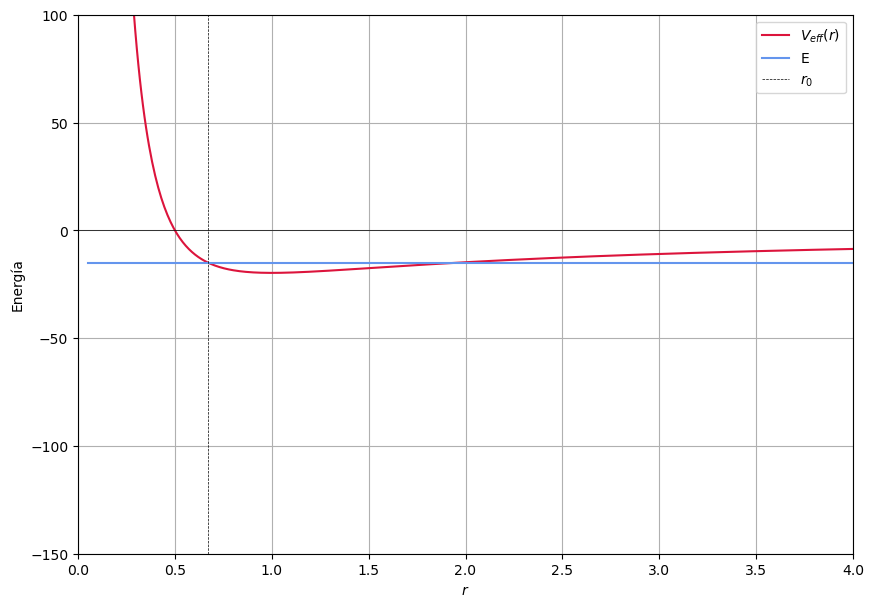

E = -15
h = 6.283185307179586
v0 = 0
r0 = 0.6711450198757191


In [5]:
import numpy as np
import matplotlib.pyplot as plt

G = 4*np.pi**2
M = 1. 

def eff_potential(r, h, M=1.):
  return (h**2)/(2*r**2) - G*M/r

h = 2*np.pi
E = - 15

r0 = (-G*M + np.sqrt(G**2*M**2 + 2*E*h**2))/(2*E)


r = np.linspace(0.05,4.,500) 
plt.figure(figsize=(10,7))
plt.plot(r, eff_potential(r,h=h, M=M), color='crimson', label= r'$V_{eff}(r)$')
plt.plot(r,E*np.ones(len(r)),color='cornflowerblue',linewidth=1.5, label='E')
plt.axvline(r0, color='black',linewidth=0.5, linestyle='--', label=r'$r_0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.xlabel(r'$r$')
plt.ylabel(r'Energía')
plt.ylim(-150,100)
plt.xlim(0,4)
plt.grid()
plt.legend()
plt.show()


print('E =', E)
print('h =', h)
print('v0 =', 0)
print('r0 =', r0)

As shown above, by choosing the initial values $\ell_z = 2\pi$ and $\varepsilon = -15$ gives the set of initial conditions

\begin{equation}
    \begin{cases}
    r_0 = & 0.6711450198757191 \text{ au}\\
    \varphi_0 = & 0 \text{ rad}\\
    p_r = & 0 \text{ au} / \text{yr}\\
    p_\varphi = & 2\pi \text{ au}^2 / \text{yr} = 6.283185307179586  \text{ au}^2 / \text{yr}.
    \end{cases}
\end{equation}

---

## Runge–Kutta methods

The idea behind the Runge-Kutta (RK) methods is to fit the Taylor series expansion of $y(x)$ at $x=x_n$ to the highest possible order. The fourth order method (RK4) is given by the following equations:

### RK4

\begin{align}
k_1 &=\Delta x f(x_n,y_n)\,\,,\\
k_2 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_1)\,\,,\nonumber\\
k_3 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_2)\,\,,\nonumber\\
k_4 &=\Delta x f(x_n+\Delta x,y_n + k_3)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) + \mathcal{O}(\Delta x^5)\,\,.
\end{align}

In [6]:
# Computation time
import time

# Runge-Kutta 4 Algorithm
def RK4(ODE, t0, q0, tf, n):
    '''
    ------------------------------------------
    RK4(h, t0, q0)
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    n: Number of steps for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    dt = (tf - t0)/(n-1)
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        k1 = dt*ODE(q[i-1,0], q[i-1,1:])
        k2 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k1/2)
        k3 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k2/2)
        k4 = dt*ODE(q[i-1,0] + dt, q[i-1,1:] + k3)
        q[i,1:] = q[i-1,1:] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return q


# Creation of the time grid (in years)
t0 = 0.
tf = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
dt = (tf - t0)/n

# Initial Conditions
r0 = 0.6711450198757191 # [au]
phi0 = 0. # [au]
p_r0 = 0. # [au/yr]
p_phi0 = 2*np.pi # [au^2/yr]
Q0 = np.array([r0, phi0, p_r0, p_phi0])



# Solving the System
start = time.time()
Q = RK4(f, t0, Q0, tf, n)
conservedQuantities = conserv_quant(Q)
end = time.time()

print('The computation time was:', end - start)

The computation time was: 1.3888521194458008


Visualization of the x-coordinate as function of time: 

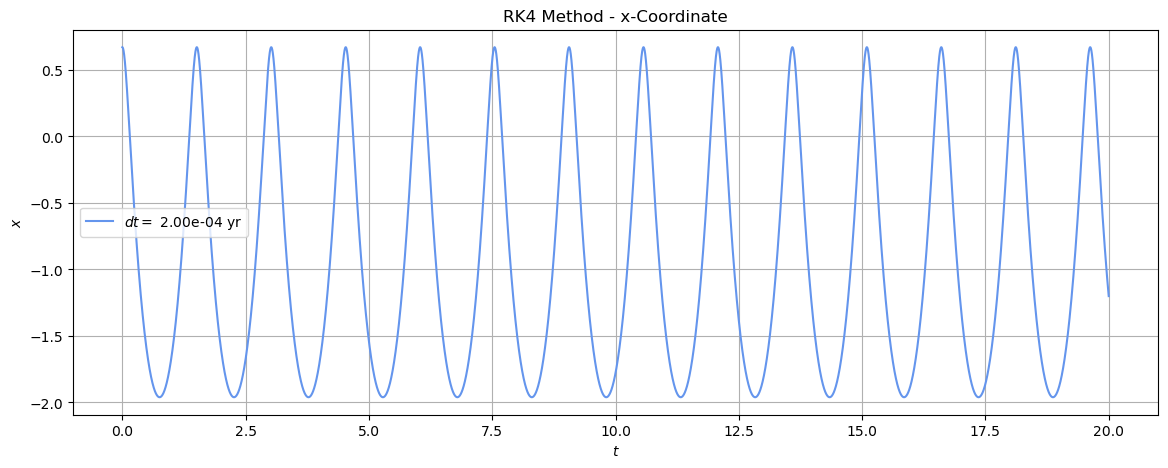

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
X = Q[:,1]*np.cos(Q[:,2])
Y = Q[:,1]*np.sin(Q[:,2])

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(Q[:,0], X, color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')

ax.set_title('RK4 Method - x-Coordinate')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend()
ax.grid()
plt.show()

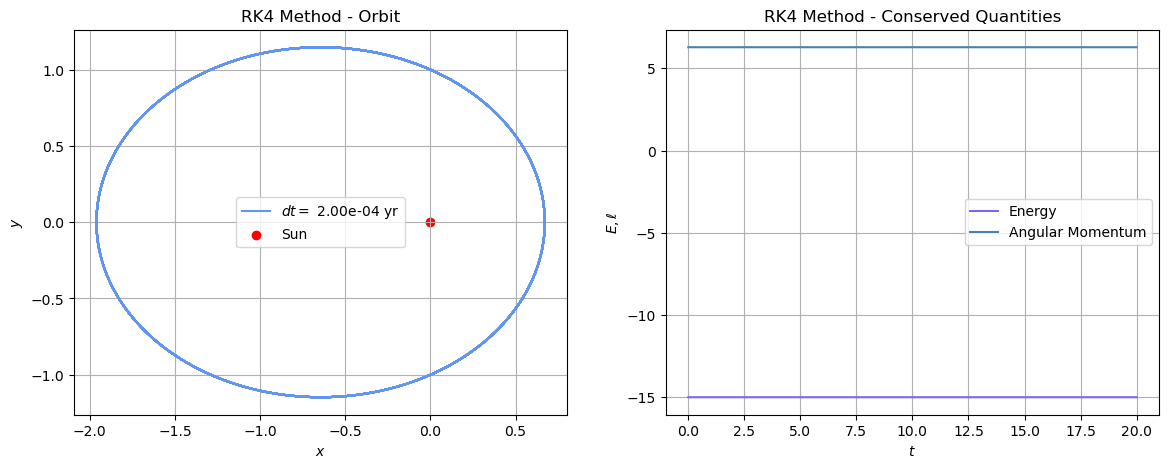

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(X, Y, color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('RK4 Method - Orbit')
ax[0].scatter(0,0, color='red', label='Sun')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()
ax[0].grid()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()
ax[1].grid()

plt.show()

The change in energy and angular momentum is:

In [9]:
print('The energy change is :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nThe angular momentum change is :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

The energy change is : 1.326938559031987e-12

The angular momentum change is : 0.0


---



In [10]:
# Creation of the time grid (in years)
t0 = 0.
tf = 20.

# Number of steps in the grid
n = 500000

# Constant stepsize defined by the number of steps in the grid
dt = (tf - t0)/n

# Initial Conditions
Q0 = np.array([r0, phi0, p_r0, p_phi0])

# Solving the System
start = time.time()
Q = RK4(f, t0, Q0, tf, n)
conservedQuantities = conserv_quant(Q)
end = time.time()
print('The computation time was:', end - start)

The computation time was: 6.563928842544556


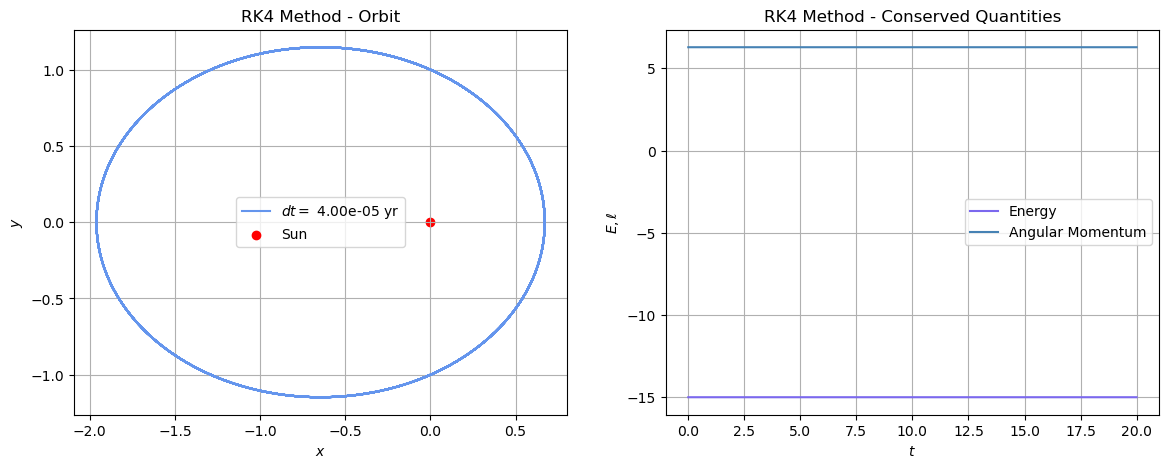

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

X = Q[:,1]*np.cos(Q[:,2])
Y = Q[:,1]*np.sin(Q[:,2])


fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(X, Y, color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].scatter(0,0, color='red', label='Sun')
ax[0].set_title('RK4 Method - Orbit')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].grid()
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].grid()
ax[1].legend()

plt.show()

In [12]:
print('The energy change is :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nThe angular momentum change is :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

The energy change is : 2.0605739337042905e-13

The angular momentum change is : 0.0


In [ ]:
# Save data of the orbit
#np.savetxt('particle_orbit.txt', Q, header='t r th p_r p_th')

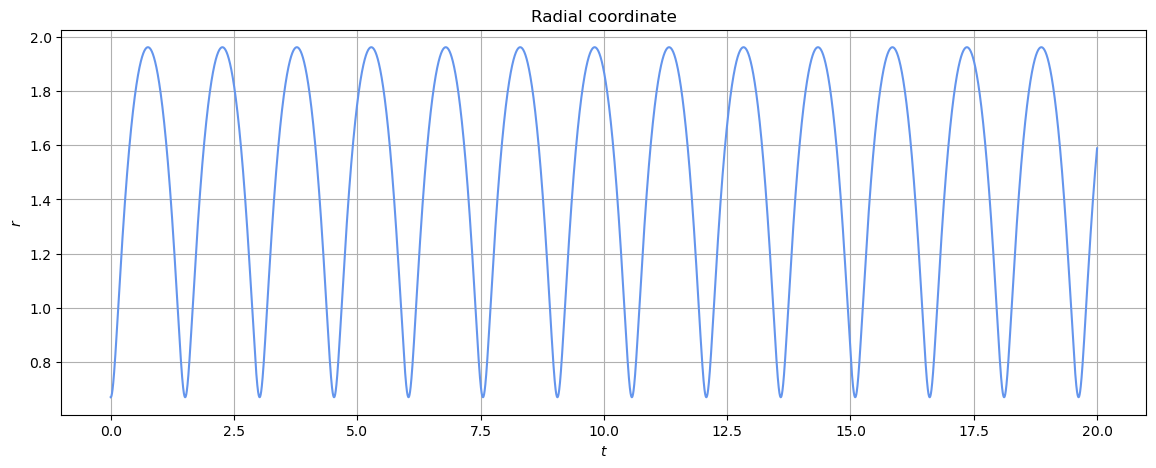

In [15]:
plt.figure(figsize=(14,5))
plt.plot(Q[:,0], Q[:,1], color='cornflowerblue')
plt.xlabel(r'$t$')
plt.ylabel(r'$r$')
plt.title(r'Radial coordinate')
plt.grid()
plt.show()